## Final Project Submission

Please fill out:
* Student name:  Farhiya Jarso
* Student pace: self paced / part time / full time : Full - time
* Scheduled project review date/time: 18/3/2024 - 24/3/2024
* Instructor name: 
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [195]:
#importing the necessary packages
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
#Data used
# im.db.zip
# Zipped SQLite database (you will need to unzip then query using SQLite)
# movie_basics and movie_ratings tables are the most relevant
# bom.movie_gross.csv.gz
# Compressed CSV file (you can open without expanding the file using pd.read_csv)

In [9]:
#loading im.db.zip file
conn = sqlite3.connect("zippedData\im.db\im.db")
conn

In [45]:
pd.read_sql("""
   SELECT * 
   FROM movie_basics
   """, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [46]:
pd.read_sql("""
   SELECT * 
   FROM movie_ratings
   """, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [140]:
pd.read_sql("""
   SELECT  genres, AVG(averagerating) as avg_rating 
      FROM movie_basics
    JOIN  movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
    GROUP BY genres
    ORDER BY avg_rating DESC 
    LIMIT 10
   """, conn)

,genres,avg_rating
0,"Comedy,Documentary,Fantasy",9.4
1,"Documentary,Family,Musical",9.3
2,"History,Sport",9.2
3,"Music,Mystery",9.0
4,Game-Show,9.0
5,"Drama,Short",8.8
6,"Drama,Fantasy,War",8.8
7,"Documentary,News,Sport",8.8
8,"Documentary,News,Reality-TV",8.8
9,"Comedy,Drama,Reality-TV",8.8


In [141]:
pd.read_sql("""
   SELECT  genres, AVG(averagerating) as avg_rating 
      FROM movie_basics
    JOIN  movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
    GROUP BY genres
    ORDER BY avg_rating ASC
    LIMIT 10
   """, conn)

,genres,avg_rating
0,"Comedy,Musical,Sport",1.400000
1,"Adult,Horror",2.000000
2,"Adventure,Crime,Romance",2.300000
3,"History,Sci-Fi,Thriller",2.300000
4,"Crime,Music",2.400000
5,"Horror,War",2.633333
6,"Animation,Horror,Romance",2.800000
7,"Documentary,Drama,Western",2.900000
8,"Animation,Comedy,Musical",3.133333
9,"Crime,Horror,Musical",3.150000


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [142]:
#loading the tn.movie_budgets data file
df1 = pd.read_csv("zippedData/tn.movie_budgets.csv")
df1.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [143]:
df1 = pd.read_csv("zippedData/tmdb.movies.csv")
df1.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [144]:
# checking for missing values in each column
missing_values = df1.isnull().any()
missing_values

Unnamed: 0           False
genre_ids            False
id                   False
original_language    False
original_title       False
popularity           False
release_date         False
title                False
vote_average         False
vote_count           False
dtype: bool

In [208]:
# showing average popularity of movies by language
#  Group by 'original_language' and calculate the mean of 'popularity' for each language
average_popularity_by_language = df1.groupby('original_language')['popularity'].mean()

# Sort languages based on average popularity and select top 5
top_5_languages = average_popularity_by_language.nlargest(5)

# Print the top 5languages by average popularity of movies
print("Top 5 Languages by Average Popularity of Movies:")
print(top_5_languages)

Top 5 Languages by Average Popularity of Movies:
original_language
nb    8.221000
sw    7.440000
ja    5.711072
hz    5.495000
uk    5.331000
Name: popularity, dtype: float64


In [209]:
# showing average popularity of movies by language
#  Group by 'original_language' and calculate the mean of 'popularity' for each language
average_popularity_by_language = df1.groupby('original_language')['popularity'].mean()

# Sort languages based on average popularity and select top 5
least_5_languages = average_popularity_by_language.nsmallest(5)

# Print the least 5 languages by average popularity of movies
print("Least 5 Languages by Average Popularity of Movies:")
print(least_5_languages)

Least 5 Languages by Average Popularity of Movies:
original_language
bo    0.6
cr    0.6
cy    0.6
dz    0.6
ha    0.6
Name: popularity, dtype: float64


In [170]:
#loading the bom.movie data
df2 = pd.read_csv("zippedData/bom.movie_gross.csv")
df2.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [171]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [172]:
# checking for missing values in each column
missing_values = df2.isnull().any()
missing_values

title             False
studio             True
domestic_gross     True
foreign_gross      True
year              False
dtype: bool

In [173]:
# checking total missing values in each column
total_missing_values = df2.isna().sum()
total_missing_values

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [174]:
#calculating the percentage of rows with missing values in the "domestic_gross" column
percentage_missing_domestic_gross = (df2["domestic_gross"].isna().sum()/len(df2))*100
print("percentage of missing values in the domestic_gross:" , percentage_missing_domestic_gross)
#number of unique values in the "domestic_gross"
num_unique_domestic_gross = df2["domestic_gross"].nunique()
print("number of unique_domestic_gross:", num_unique_domestic_gross)

percentage of missing values in the domestic_gross: 0.8266902863891349
number of unique_domestic_gross: 1797


In [169]:
#drop the "domestic_gross" empties
#df2.drop(columns=["domestic_gross"], inplace=True)
#df2.dropna(inplace =True)

In [175]:
#check the remaining nuumber of null values in each column
remaining_missing_values = df2.isna().sum()
remaining_missing_values

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

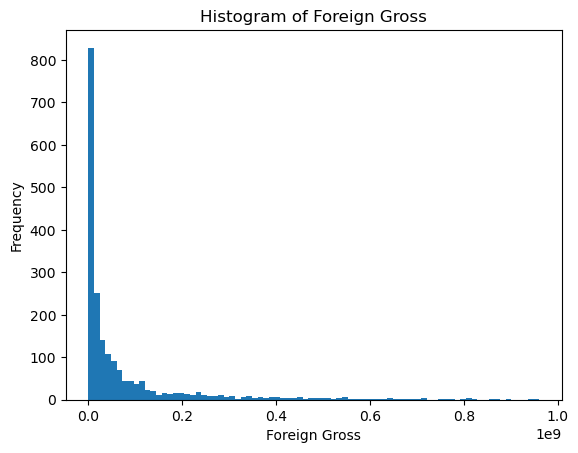

Mean_foreign_gross: 75979668.67282717
Median_foreign_gross: 19600000.0


In [197]:
#computing placeholder values for missing foreign_gross
# Convert "foreign_gross" column to numeric, handling errors
df2['foreign_gross'] = pd.to_numeric(df2['foreign_gross'], errors='coerce')

# Remove NaN values
df2.dropna(subset=['foreign_gross'], inplace=True)

# Plot histogram
plt.hist(df2['foreign_gross'], bins=80)
plt.title('Histogram of Foreign Gross')
plt.xlabel('Foreign Gross')
plt.ylabel('Frequency')
plt.show()


#print out the mean and medioan for the "foreign_gross" column
foreign_gross_mean = df2["foreign_gross"].mean()
foreign_gross_median = df2["foreign_gross"].median()

print("Mean_foreign_gross:", foreign_gross_mean)
print("Median_foreign_gross:", foreign_gross_median)



In [177]:
#imputing null vales in foreign_gross with the median
df2['foreign_gross'].fillna(foreign_gross_median, inplace=True)


In [178]:
#checking the remaing null values
remaining_missing_values = df2.isna().sum()
remaining_missing_values

title              0
studio             4
domestic_gross    28
foreign_gross      0
year               0
dtype: int64

In [179]:
percentage_missing_studio = (df2["studio"].isna().sum()/len(df2))*100
print("percentage of missing values in the studio:" , percentage_missing_studio)
#number of unique values in the "studio"
num_unique_studio = df2["studio"].nunique()
print("number of unique studio:", num_unique_studio)

percentage of missing values in the studio: 0.19685039370078738
number of unique studio: 175


In [180]:
#dropping the rows containing values in studio
df2.dropna(inplace =True)

In [181]:
#checking the remaing null values
remaining_missing_values = df2.isna().sum()
remaining_missing_values

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [188]:
#Calculate the average domestic_gross,  for each studio per year

# Convert 'year' column to datetime if it's not already in datetime format
df2['year'] = pd.to_datetime(df2['year'], format='%Y')

# Group by 'studio' and 'year' and calculate the average domestic_gross
average_domestic_gross_per_studio_year = df2.groupby(['studio', df2['year'].dt.year])['domestic_gross'].mean()

# Sort studios based on average domestic gross revenue and select top 10
top_10_studios = average_domestic_gross_per_studio_year.nlargest(10)

# # Print the resulting Series
# print(average_domestic_gross_per_studio_year)
# Print the top 10 studios
print("Top 10 Studios by Average Domestic Gross Revenue:")
print(top_10_studios)


Top 10 Studios by Average Domestic Gross Revenue:
studio   year
BV       2017    2.972750e+08
         2018    2.629778e+08
P/DW     2011    2.223000e+08
BV       2016    2.208462e+08
         2013    1.816400e+08
P/DW     2010    1.694250e+08
BV       2015    1.559000e+08
WB (NL)  2012    1.484667e+08
BV       2012    1.302917e+08
WB (NL)  2013    1.267800e+08
Name: domestic_gross, dtype: float64


In [185]:
#Calculate the average foreign_gross,  for each studio per year

# Convert 'year' column to datetime if it's not already in datetime format
df2['year'] = pd.to_datetime(df2['year'], format='%Y')

# Group by 'studio' and 'year' and calculate the average domestic_gross
average_foreign_gross_per_studio_year = df2.groupby(['studio', df2['year'].dt.year])['foreign_gross'].mean()

# Print the resulting Series
print(average_foreign_gross_per_studio_year)

studio  year
3D      2010    9.900000e+06
A24     2013    1.545000e+07
        2014    3.400000e+06
        2015    1.393333e+07
        2016    1.117244e+07
                    ...     
Zee     2016    5.710000e+05
Zeit.   2010    6.650000e+06
        2011    2.100000e+06
        2012    1.200000e+06
        2014    3.700000e+06
Name: foreign_gross, Length: 493, dtype: float64


In [200]:
# Group by 'studio' and calculate the mean of 'domestic_gross' and 'foreign_gross' across all data
average_gross_per_studio = df2.groupby('studio').agg({'domestic_gross': 'mean', 'foreign_gross': 'mean'})

# Round the average domestic gross and foreign gross values to whole numbers
average_gross_per_studio['domestic_gross'] = average_gross_per_studio['domestic_gross'].round()
average_gross_per_studio['foreign_gross'] = average_gross_per_studio['foreign_gross'].round()

# Sort studios based on average domestic gross revenue and select top 10
top_10_domestic_studios = average_gross_per_studio['domestic_gross'].nlargest(10)

# Sort studios based on average foreign gross revenue and select top 10
top_10_foreign_studios = average_gross_per_studio['foreign_gross'].nlargest(10)

# Print the top 10 studios for domestic gross
print("Top 10 Studios by Average Domestic Gross Revenue:")
print(top_10_domestic_studios)

# Print the top 10 studios for foreign gross
print("\nTop 10 Studios by Average Foreign Gross Revenue:")
print(top_10_foreign_studios)

Top 10 Studios by Average Domestic Gross Revenue:
studio
P/DW       168290000.0
BV         164519894.0
WB          93258462.0
WB (NL)     90343182.0
MGM         83000000.0
Uni.        82700270.0
Fox         81526119.0
Par.        80646944.0
Sony        80566468.0
Sum.        66433643.0
Name: domestic_gross, dtype: float64

Top 10 Studios by Average Foreign Gross Revenue:
studio
HC          867600000.0
P/DW        339360000.0
BV          252880904.0
GrtIndia    234000000.0
Fox         149670646.0
WB (NL)     144068182.0
WB          143599254.0
FUN         137150000.0
WAMCR       134950000.0
Sony        132811771.0
Name: foreign_gross, dtype: float64


In [211]:
# Group by 'studio' and calculate the mean of 'domestic_gross' and 'foreign_gross' across all data
average_gross_per_studio = df2.groupby('studio').agg({'domestic_gross': 'mean', 'foreign_gross': 'mean'})

# Round the average domestic gross and foreign gross values to whole numbers
average_gross_per_studio['domestic_gross'] = average_gross_per_studio['domestic_gross'].round()
average_gross_per_studio['foreign_gross'] = average_gross_per_studio['foreign_gross'].round()

# Sort studios based on average domestic gross revenue and select top 10
least_10_domestic_studios = average_gross_per_studio['domestic_gross'].nsmallest(10)

# Sort studios based on average foreign gross revenue and select top 10
least_10_foreign_studios = average_gross_per_studio['foreign_gross'].nsmallest(10)

# Print the least 10 studios for domestic gross
print("Least 10 Studios by Average Domestic Gross Revenue:")
print(least_10_domestic_studios)

# Print the top least 10 studios for foreign gross
print("\nLeast 10 Studios by Average  Gross Revenue:")
print(least_10_foreign_studios)

Top 10 Studios by Average Domestic Gross Revenue:
studio
DR              800.0
Shout!         2800.0
ParC           5900.0
Libre          7200.0
Grindstone    10000.0
Olive         10900.0
Crnth         11300.0
Outs          11600.0
RF            13000.0
EpicPics      14400.0
Name: domestic_gross, dtype: float64

Least 10 Studios by Average  Gross Revenue:
studio
Darin Southa     5200.0
ICir             6400.0
IVP              9100.0
ITL             11800.0
Icar.           13700.0
FOAK            17300.0
WOW             18600.0
Crnth           27000.0
KC              30300.0
Viv.            60300.0
Name: foreign_gross, dtype: float64
